In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV,ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels.api as sm

#set_style
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

In [2]:
#read in cleaned data file
ames_clean = pd.read_csv('../datasets/ames_train_clean.csv')

In [3]:
ames_clean.head()

,saleprice,age,neighborhood_order,local_conditions,was_remodeled,overall_qual,house_style_condensed_1.5,house_style_condensed_2.0,exter_qual,external_feature,...,paved_drive,bsmt_qual,bsmt_type*sf_all,bsmt_exposure,heating_qc,kitchen_qual,fireplace_qu,quality_above_sqft,totrms_abvgrd,room_size
0,130500,34,2,1,1,6,0,1,4,7,...,2,3,3198.0,1,5,4,0,1479,6,246.500000
1,220000,13,2,2,1,7,0,1,4,10,...,2,4,3822.0,1,5,4,3,2122,8,265.250000
2,109000,57,2,2,1,5,0,0,3,10,...,2,3,4386.0,1,3,4,0,1057,5,211.400000
3,174000,4,4,2,1,5,0,1,3,10,...,2,4,0.0,1,4,3,0,1444,7,206.285714
4,138500,110,2,2,1,6,1,0,3,7,...,0,2,0.0,1,3,3,0,1445,6,240.833333


In [4]:
skew_list = []
for i in ames_clean.columns:
    print(i)
    print(skew(ames_clean[i]))
    skew_list.append(skew(ames_clean[i]))
#     print(i)
#     skew(ames_clean[i])
#     print(skew(ames_clean[i]))
    

saleprice
1.211685177269888
age
0.5885706793241927
neighborhood_order
0.1615655940787287
local_conditions
-1.4898980522341523
was_remodeled
0.15689967782033148
overall_qual
0.093189102421719
house_style_condensed_1.5
2.1024843565171656
house_style_condensed_2.0
0.8777338244973057
exter_qual
0.7366066966708162
external_feature
-0.13613664186476138
bldg_type_TwnhsE
3.1166221243600987
bldg_type_Twnhs
5.147708276391942
bldg_type_2fmCon
6.420187119704591
is_hip_roof
1.533448818010443
mas_vnr_area
2.5834895733238707
functional
-3.482870477335272
lot_frontage
1.375437988110443
lot_area
9.926230738991432
developed_outside_sf
1.2874296841275221
garage_fin*sqft
0.9133609084886672
garage_cars
-0.22957849173329495
paved_drive
-2.997664709408315
bsmt_qual
-1.3027901090052063
bsmt_type*sf_all
0.9722031934886036
bsmt_exposure
1.1346210172762028
heating_qc
-0.5656866939113121
kitchen_qual
0.44490933851191555
fireplace_qu
0.1956705247859251
quality_above_sqft
0.75682152155745
totrms_abvgrd
0.7334720970

In [5]:
print(len(ames_clean.columns))
print(len(skew_list))

31
31


In [6]:
print(ames_clean.columns)
print(skew_list)

Index(['saleprice', 'age', 'neighborhood_order', 'local_conditions',
       'was_remodeled', 'overall_qual', 'house_style_condensed_1.5',
       'house_style_condensed_2.0', 'exter_qual', 'external_feature',
       'bldg_type_TwnhsE', 'bldg_type_Twnhs', 'bldg_type_2fmCon',
       'is_hip_roof', 'mas_vnr_area', 'functional', 'lot_frontage', 'lot_area',
       'developed_outside_sf', 'garage_fin*sqft', 'garage_cars', 'paved_drive',
       'bsmt_qual', 'bsmt_type*sf_all', 'bsmt_exposure', 'heating_qc',
       'kitchen_qual', 'fireplace_qu', 'quality_above_sqft', 'totrms_abvgrd',
       'room_size'],
      dtype='object')
[1.211685177269888, 0.5885706793241927, 0.1615655940787287, -1.4898980522341523, 0.15689967782033148, 0.093189102421719, 2.1024843565171656, 0.8777338244973057, 0.7366066966708162, -0.13613664186476138, 3.1166221243600987, 5.147708276391942, 6.420187119704591, 1.533448818010443, 2.5834895733238707, -3.482870477335272, 1.375437988110443, 9.926230738991432, 1.28742968412752

In [7]:
skew_zip = zip(ames_clean.columns, skew_list)   

In [17]:
print(skew_zip)

In [9]:
ames_clean

,saleprice,age,neighborhood_order,local_conditions,was_remodeled,overall_qual,house_style_condensed_1.5,house_style_condensed_2.0,exter_qual,external_feature,...,paved_drive,bsmt_qual,bsmt_type*sf_all,bsmt_exposure,heating_qc,kitchen_qual,fireplace_qu,quality_above_sqft,totrms_abvgrd,room_size
0,130500,34,2,1,1,6,0,1,4,7,...,2,3,3198.0,1,5,4,0,1479,6,246.500000
1,220000,13,2,2,1,7,0,1,4,10,...,2,4,3822.0,1,5,4,3,2122,8,265.250000
2,109000,57,2,2,1,5,0,0,3,10,...,2,3,4386.0,1,3,4,0,1057,5,211.400000
3,174000,4,4,2,1,5,0,1,3,10,...,2,4,0.0,1,4,3,0,1444,7,206.285714
4,138500,110,2,2,1,6,1,0,3,7,...,0,2,0.0,1,3,3,0,1445,6,240.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,298751,1,4,2,0,8,0,0,4,10,...,2,4,6066.0,3,5,4,4,1728,7,246.857143
2029,82500,69,1,2,1,4,0,0,3,10,...,2,3,1048.0,1,5,3,0,861,4,215.250000
2030,177000,81,3,2,1,6,1,0,3,10,...,2,3,0.0,1,4,3,3,1913,9,212.555556
2031,144000,53,2,2,0,4,0,0,3,8,...,2,3,1965.0,1,3,3,4,1200,6,200.000000


In [10]:
#measure skew
skew(ames_clean['saleprice'])

1.211685177269888

In [29]:
#normalize function
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [40]:
#try a log on it
ames_clean['price_log'] = np.log(ames_clean['saleprice'])

#log +1
ames_clean['price_log1'] = np.log(ames_clean['saleprice']+1)
#log +1 normalized
ames_clean['price_log1_norm'] = normalize(ames_clean['price_log1'])

#cube root
ames_clean['price_cubert'] = (ames_clean['saleprice']**(1/3))

#log max root
log_max = np.log(ames_clean['saleprice'].max())
ames_clean['price_logmax'] = ames_clean['saleprice']**(1/log_max)

In [41]:
print(skew(ames_clean['price_log']))
print(skew(ames_clean['price_log1']))
print(skew(ames_clean['price_log1_norm']))
print(skew(ames_clean['price_cubert']))
print(skew(ames_clean['price_logmax']))

-0.2766713070155167
-0.27664581372245506
-0.2766458137224575
0.3419706976634892
-0.11113477213289116


In [49]:
#taking the inverse of function of log(price) to convert log(price) back to salesprice
ames_clean['price_log_to_norm'] = np.exp(ames_clean['price_log'])
ames_clean[['price_log', 'price_log_to_norm','saleprice']]

,price_log,price_log_to_norm,saleprice
0,11.779129,130500.0,130500
1,12.301383,220000.0,220000
2,11.599103,109000.0,109000
3,12.066811,174000.0,174000
4,11.838626,138500.0,138500
...,...,...,...
2028,12.607366,298751.0,298751
2029,11.320554,82500.0,82500
2030,12.083905,177000.0,177000
2031,11.877569,144000.0,144000


<AxesSubplot:>

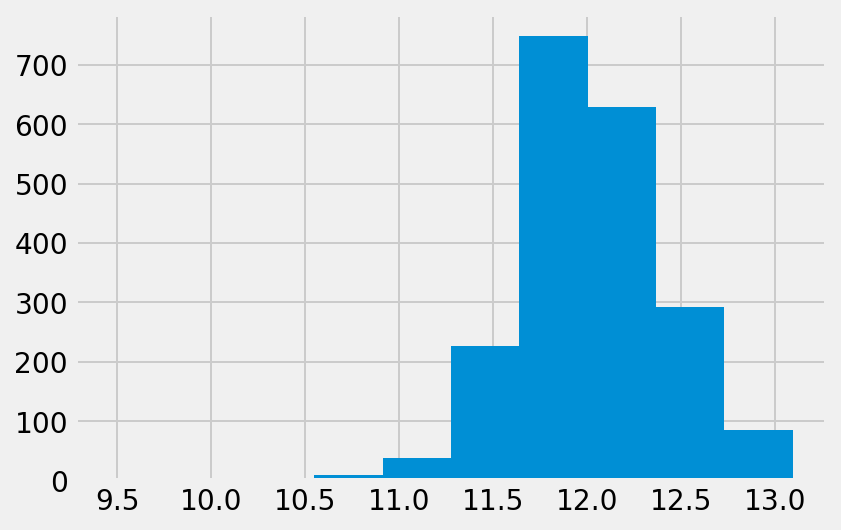

In [18]:
ames_clean['price_log'].hist();

<AxesSubplot:>

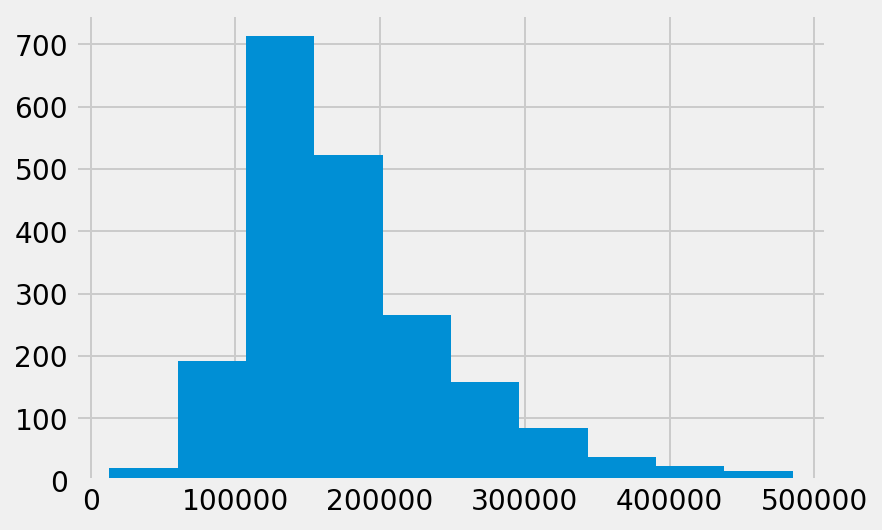

In [13]:
ames_clean['saleprice'].hist()

#### print ames_skew_adj

In [47]:
ames_skew_eval = ames_clean[['price_log','age','neighborhood_order','local_conditions','was_remodeled','overall_qual', 
                  'house_style_condensed_1.5', 'house_style_condensed_2.0','exter_qual','external_feature',
                  'bldg_type_TwnhsE','bldg_type_Twnhs','bldg_type_2fmCon', 'is_hip_roof','mas_vnr_area',  
                  'functional', 'lot_frontage', 'lot_area','developed_outside_sf'
                  ,'garage_fin*sqft','garage_cars', 'paved_drive',
                 'bsmt_qual','bsmt_type*sf_all', 'bsmt_exposure',
                 'heating_qc','kitchen_qual', 'fireplace_qu', 
                 'quality_above_sqft', 'totrms_abvgrd', 'room_size']]

In [50]:
ames_skew_eval.to_csv('../datasets/skew_eval.csv', index = False)